In [40]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = 'D:\\Neural Network\\CNN\\multi label classification\\train-20230214T131531Z-001\\train'
test_path = 'D:\\Neural Network\\CNN\\multi label classification\\test-20230214T131518Z-001\\test'

In [3]:
preprocessing_train = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,vertical_flip = True,horizontal_flip= True)
preprocessing_test = ImageDataGenerator(rescale = 1./255)

In [4]:
labels = ['COVID19','NORMAL','PNEUMONIA']

In [5]:
train_data = preprocessing_train.flow_from_directory(train_path,target_size=[256,256],classes=labels,class_mode='categorical',batch_size = 32)
test_data = preprocessing_train.flow_from_directory(test_path,target_size=[256,256],classes=labels,class_mode='categorical',batch_size = 32)

Found 2555 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


 Now i am not deploying my own custom model so i am talking a copy of VGG16 Architecture

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16

making image size

In [7]:
image_size = [256,256]

In [8]:
vgg = VGG16(input_shape = image_size+[3],weights = "imagenet",include_top=False)


In [9]:
for i in vgg.layers:
  i.trainable = False

In [10]:
from tensorflow.keras.layers import Flatten 

Developing my own output layer

In [11]:
y = Flatten()(vgg.output)

In [12]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import softmax

In [13]:
from keras.api._v2.keras import activations
final = Dense(3,activation="softmax")(y)

In [14]:
from tensorflow.keras.models import Model

In [15]:
vgg16_model = Model(vgg.inputs,final)


In [16]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [17]:
vgg16_model.compile(optimizer = 'adam',loss ="categorical_crossentropy",metrics = ["Accuracy"])

In [18]:
vgg16_model.fit(train_data,epochs = 5)

Epoch 1/5
80/80 [==============================] - 1420s 18s/step - loss: 0.5578 - Accuracy: 0.8059
Epoch 2/5
80/80 [==============================] - 1388s 17s/step - loss: 0.2677 - Accuracy: 0.9033
Epoch 3/5
80/80 [==============================] - 1414s 18s/step - loss: 0.2469 - Accuracy: 0.9080
Epoch 4/5
80/80 [==============================] - 1315s 16s/step - loss: 0.2107 - Accuracy: 0.9217
Epoch 5/5
80/80 [==============================] - 1444s 18s/step - loss: 0.1778 - Accuracy: 0.9311


Chicking with Test Data

In [19]:
test_data.classes

array([0, 0, 0, ..., 2, 2, 2])

In [20]:
y_test_pred = vgg16_model.predict(test_data)

41/41 [==============================] - 787s 19s/step


In [43]:
y_test_pred

array([[6.2566301e-06, 9.8638815e-01, 1.3605653e-02],
       [7.8432828e-01, 1.2027421e-02, 2.0364426e-01],
       [5.0389666e-05, 2.7712410e-02, 9.7223717e-01],
       ...,
       [2.1803087e-05, 9.7528833e-01, 2.4689818e-02],
       [9.8449782e-05, 9.5999408e-01, 3.9907459e-02],
       [6.1819509e-02, 1.8915407e-01, 7.4902642e-01]], dtype=float32)

In [44]:
sol = np.argmax(y_test_pred , axis = 1)
sol

array([1, 0, 2, ..., 1, 1, 2], dtype=int64)

In [45]:
test_data.classes[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
len(test_data.classes)

1288

In [47]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [48]:
accuracy_score(test_data.classes,sol)

0.49301242236024845

In [49]:
confusion_matrix(test_data.classes,sol)

array([[ 12,  32,  72],
       [ 35, 106, 176],
       [ 81, 257, 517]], dtype=int64)

In [50]:
print(classification_report(test_data.classes,sol))

              precision    recall  f1-score   support

           0       0.09      0.10      0.10       116
           1       0.27      0.33      0.30       317
           2       0.68      0.60      0.64       855

    accuracy                           0.49      1288
   macro avg       0.35      0.35      0.34      1288
weighted avg       0.52      0.49      0.51      1288



checking with real data

In [51]:
import cv2

In [52]:
labels = ['COVID19','NORMAL','PNEUMONIA']

In [53]:
from tensorflow.keras.preprocessing import image

In [63]:
def fun(path):
    #load the image
    image = plt.imread(path)
    print(image.shape)
    image = cv2.resize(image,(256,256))
    print(image.shape)
    #since training has done with pixel value after scalling down to 0-1 so the test also we need to scale down into 0-1
    image = np.array(image)/255
    #now we need to make sure convert data into deep learing cnn trained manner
    image = np.expand_dims(image,axis =0)
    print(image.shape)
    
    
    # giving the data to training madel
    result = vgg16_model.predict(image)
    print(result)
    sol = np.argmax(result,axis=1)
    print(sol[0])
    print(labels[sol[0]])
    img = plt.imread(path)
    plt.imshow(img)

(183, 275, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 1s 697ms/step
[[9.9156028e-01 6.0263084e-04 7.8371642e-03]]
0
COVID19


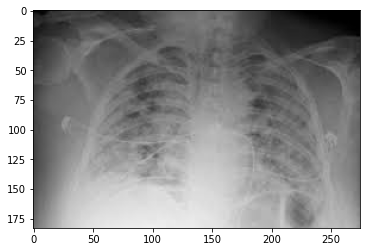

In [64]:
fun("C:/Users/Lenovo/Downloads/images.jpeg")

(225, 225, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 461ms/step
[[0.29660103 0.70020163 0.00319732]]
1
NORMAL


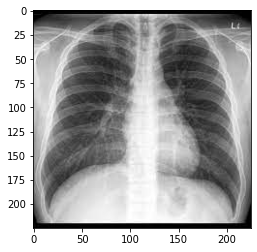

In [67]:
fun("C:/Users/Lenovo/Downloads/download (2).jpeg")